## Momentum and NAG

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0, 20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
y = -2 * X + 1
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

#### Plot your data points. 

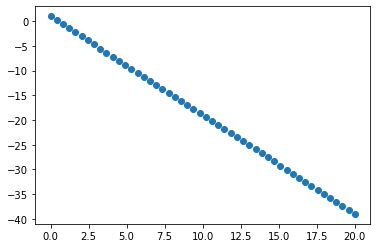

In [4]:
plt.scatter(X,y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
epochs = 100
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
m = float(len(X))
iterations = 0

for i in range(epochs):
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    h = theta_0 + theta_1 * X
    j = (1/(2 * m)) * sum((h - y)**2) 
    loss.append(j)
    gradient_theta_0 = (1 / m) * sum(h - y)
    gradient_theta_1 = (1 / m) * sum((h - y) * X)
    theta_0 = theta_0 - alpha * gradient_theta_0 
    theta_1 = theta_1 - alpha * gradient_theta_1 
    iterations += 1
    
    
    if (abs(gradient_theta_0) + abs(gradient_theta_1)) < 0.0001:
         break

In [6]:
print(thetas_0[-1])
print(thetas_1[-1])
print(loss[-1])
print(iterations)

-0.11383485505478705
-1.9171475681085686
0.1597795540730275
100


In [7]:
h = thetas_0[-1] + thetas_1[-1] * X
h

array([ -0.11383486,  -0.89634407,  -1.67885328,  -2.46136249,
        -3.2438717 ,  -4.02638091,  -4.80889012,  -5.59139934,
        -6.37390855,  -7.15641776,  -7.93892697,  -8.72143618,
        -9.50394539, -10.2864546 , -11.06896382, -11.85147303,
       -12.63398224, -13.41649145, -14.19900066, -14.98150987,
       -15.76401908, -16.5465283 , -17.32903751, -18.11154672,
       -18.89405593, -19.67656514, -20.45907435, -21.24158356,
       -22.02409278, -22.80660199, -23.5891112 , -24.37162041,
       -25.15412962, -25.93663883, -26.71914805, -27.50165726,
       -28.28416647, -29.06667568, -29.84918489, -30.6316941 ,
       -31.41420331, -32.19671253, -32.97922174, -33.76173095,
       -34.54424016, -35.32674937, -36.10925858, -36.89176779,
       -37.67427701, -38.45678622])

In [8]:
from sklearn.metrics import r2_score

In [9]:
r2_score(y, h)

0.9976972946618887

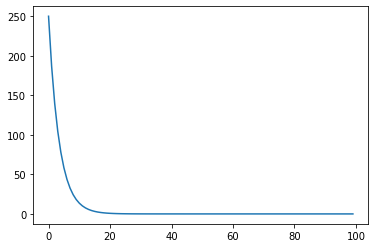

In [10]:
plt.plot(range(iterations), loss)
plt.show()

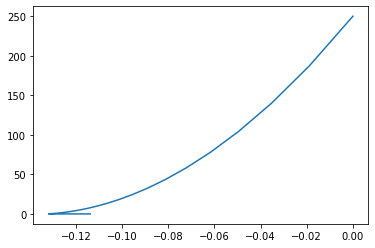

In [11]:
plt.plot(thetas_0, loss)
plt.show()

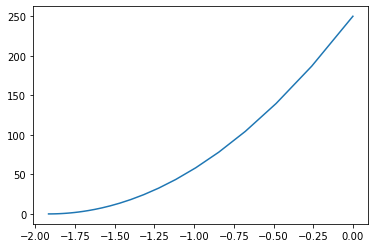

In [12]:
plt.plot(thetas_1, loss)
plt.show()

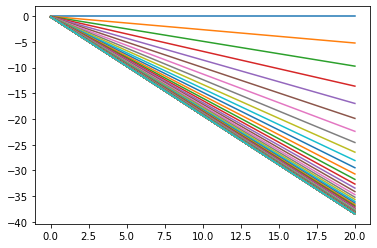

In [13]:
for i in range(len(thetas_0)):
    h = thetas_0[i] + thetas_1[i] * X
    plt.plot(X, h)
plt.show()

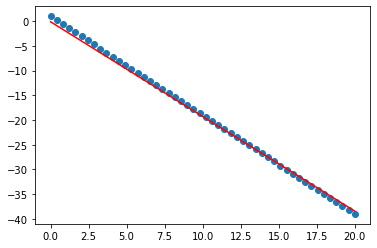

In [14]:
plt.scatter(X,y)
plt.plot(X, h, color='red')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

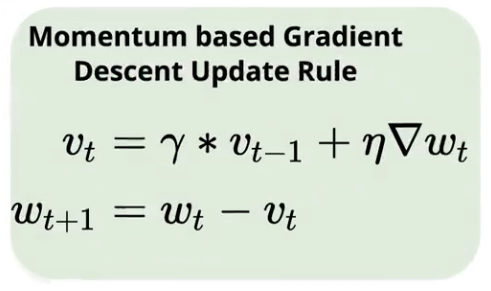

#### γ takes values between 0 and 1.
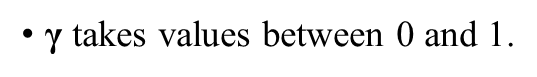

In [15]:
epochs = 100
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
m = float(len(X))
iterations = 0
gamma = 0.9
v_prev_0 = v_prev_1 = 0

for i in range(epochs):
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    h = theta_0 + theta_1 * X
    j = (1/(2 * m)) * sum((h - y)**2) 
    loss.append(j)
    v_new_0 = gamma * v_prev_0 + alpha * ((1 / m) * sum(h - y))
    v_new_1 = gamma * v_prev_1 + alpha * ((1 / m) * sum((h - y) * X))
    theta_0 = theta_0 - v_new_0
    theta_1 = theta_1 - v_new_1
    iterations += 1
    v_prev_0 = v_new_0
    v_prev_1 = v_new_1
    
    if (abs(v_new_0) + abs(v_new_1)) < 0.0001:
          break
    

In [16]:
print(thetas_0[-1])
print(thetas_1[-1])
print(loss[-1])
print(iterations)

0.0979636203801789
-1.923207049819301
0.11128995219216932
100


In [17]:
h = thetas_0[-1] + thetas_1[-1] * X

In [18]:
r2_score(y, h)

0.9983961153948776

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [19]:
epochs = 100
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
m = float(len(X))
iterations = 0
gamma = 0
v_prev_0 = v_prev_1 = 0

for i in range(epochs):
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    h = theta_0 + theta_1 * X
    j = (1/(2 * m)) * sum((h - y)**2) 
    loss.append(j)
    v_new_0 = gamma * v_prev_0 + alpha * ((1 / m) * sum(h - y))
    v_new_1 = gamma * v_prev_1 + alpha * ((1 / m) * sum((h - y) * X))
    theta_0 = theta_0 - v_new_0
    theta_1 = theta_1 - v_new_1
    iterations += 1
    v_prev_0 = v_new_0
    v_prev_1 = v_new_1
    
    if (abs(v_new_0) + abs(v_new_1)) < 0.0001:
          break
    

In [20]:
print(thetas_0[-1])
print(thetas_1[-1])
print(loss[-1])
print(iterations)

-0.11383485505478705
-1.9171475681085686
0.1597795540730275
100


In [21]:
h = thetas_0[-1] + thetas_1[-1] * X

In [22]:
r2_score(y, h)

0.9976972946618887

In [23]:
epochs = 100
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
m = float(len(X))
iterations = 0
gamma = 1
v_prev_0 = v_prev_1 = 0

for i in range(epochs):
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    h = theta_0 + theta_1 * X
    j = (1/(2 * m)) * sum((h - y)**2) 
    loss.append(j)
    v_new_0 = gamma * v_prev_0 + alpha * ((1 / m) * sum(h - y))
    v_new_1 = gamma * v_prev_1 + alpha * ((1 / m) * sum((h - y) * X))
    theta_0 = theta_0 - v_new_0
    theta_1 = theta_1 - v_new_1
    iterations += 1
    v_prev_0 = v_new_0
    v_prev_1 = v_new_1
    
    if (abs(v_new_0) + abs(v_new_1)) < 0.0001:
          break
    

In [24]:
print(thetas_0[-1])
print(thetas_1[-1])
print(loss[-1])
print(iterations)

1.1181084223218187
-0.7476248923860765
107.11599759850351
100


In [25]:
h = thetas_0[-1] + thetas_1[-1] * X

In [26]:
r2_score(y, h)

-0.5437305536254917

##### solution diverges with momentum of 1

### Update your Batch GD for one variable  implementation to be NAG and check your results

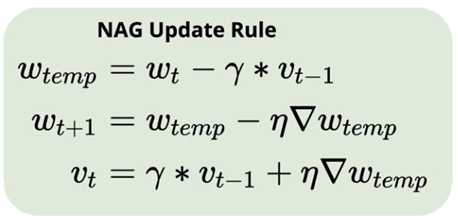

In [27]:
epochs = 100
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
m = float(len(X))
iterations = 0
gamma = 0.9
v_prev_0 = v_prev_1 = 0

for i in range(epochs):
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    h = theta_0 + theta_1 * X
    j = (1/(2 * m)) * sum((h - y)**2) 
    loss.append(j) 
    
    v_new_0 = gamma * v_prev_0 + alpha * (((1 / m) * sum(h - y)) - (gamma * v_prev_0 ))
    v_new_1 = gamma * v_prev_1 + alpha * (((1 / m) * sum((h - y) * X)) - (gamma * v_prev_1))
    theta_0 = theta_0 - v_new_0
    theta_1 = theta_1 - v_new_1
    iterations += 1
    v_prev_0 = v_new_0
    v_prev_1 = v_new_1
    
    if (abs(v_new_0) + abs(v_new_1)) < 0.0001:
          break
    

In [28]:
print(thetas_0[-1])
print(thetas_1[-1])
print(loss[-1])
print(iterations)

0.09616495563084487
-1.9235377465158268
0.11110852623499762
100


In [29]:
h = thetas_0[-1] + thetas_1[-1] * X

In [30]:
r2_score(y, h)

0.9983987300630839

## Congratulations 
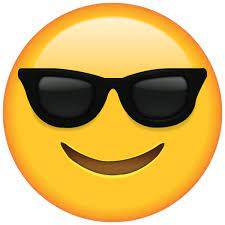